## Load libraries

In [1]:
library(outlierensembles)
library(DDoutlier)

## Load data

In [2]:
data.dir <- paste(getwd(), "data", sep="/")
data.matrix.original <- paste(data.dir, "data_matrix_qc_1.csv", sep="/")

## Format data

In [3]:
data <- read.csv(data.matrix.original)
rownames(data) <- data$micro_specimen_id
index <- data[, (ncol(data)-1):ncol(data)]
data <- subset(data, select = -c(X, micro_specimen_id, person_id))
data[is.na(data)] <- 0
head(data)

,seven_day_mortality,fourteen_day_mortality,twentyone_day_mortality,twentyeight_day_mortality,sixty_day_mortality,ninety_day_mortality,onetwenty_day_mortality,Ambulatory.Clinic...Center,Ambulatory.Surgical.Center,Emergency.Room...Hospital,⋯,hemoglobin_first,creatinine_first,potassium_last,chloride_last,glucose_last,sodium_last,bicarbonate_last,hemoglobin_last,creatinine_last,time_to_antibiotic
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2940,0,0,0,1,1,1,1,0,0,1,⋯,-0.5863791,2.44104127,-0.05335977,-0.8047264,0.7267777,-0.8003289,0.04854061,-0.85754314,-0.077536416,0.01877790
3236,0,1,1,1,1,1,1,0,0,1,⋯,-0.9423671,-0.06698246,1.67759695,-1.8403146,0.6153965,-1.7450004,0.62190535,-1.03771174,0.988716133,0.01877790
3720,0,0,0,0,0,0,0,0,0,0,⋯,-0.5355237,-0.34565176,-1.43812515,-1.6923735,1.3765017,-0.9892632,1.00414851,-0.37709353,-0.290786926,0.02208091
5214,0,0,0,0,0,0,0,0,0,0,⋯,-0.7898008,-0.55465374,0.29283158,-0.5088441,-0.1642723,-1.7450004,-1.09818886,-0.67737453,-0.504037436,-1.10796089
10611,0,0,0,0,0,0,0,0,0,1,⋯,1.0918496,-0.76365572,-0.39955111,1.4143911,0.7639048,0.3332769,-0.33370255,0.04329988,-0.859454953,0.03405431
10923,0,0,0,1,1,1,1,0,0,1,⋯,-0.6880900,0.28135417,-0.57264679,0.2308617,-0.6283608,-0.9892632,-1.48043202,-0.97765554,-0.006452913,0.03281568


## Unsupervized Outlier detection algorithms

In [4]:
y1 <- DDoutlier::KNN_AGG(data)

In [5]:
y2 <- DDoutlier::LOF(data)

In [6]:
# y3 <- DDoutlier::COF(data, k=10)

In [7]:
y4 <- DDoutlier::INFLO(data)

In [8]:
y5 <- DDoutlier::KDEOS(data)

In [9]:
y6 <- DDoutlier::LDF(data)

In [10]:
# y7 <- DDoutlier::LDOF(data, k=10)

In [26]:
# Y <- cbind.data.frame(y1, y2, y3, y4, y5, y6$LDF, y7)
Y <- cbind.data.frame(y1, y2, y4)
# Y <- cbind.data.frame(y1, y4)

In [27]:
head(Y)

,y1,y2,y4
,<dbl>,<dbl>,<dbl>
1,379.9726,0.9770689,1.0182663
2,313.6969,1.0086139,0.9173485
3,389.3603,1.4408002,1.4436545
4,212.1525,1.0077021,0.9635029
5,422.9763,1.1751721,0.9553521
6,310.4655,1.0785824,0.7159183


In [28]:
sum(is.na(Y$y5))

[1] 0

## Item Response Theory (IRT) emsemble

In [29]:
ens1 <- irt_ensemble(Y)

## IRT emsemble scores

In [30]:
summary(ens1$scores)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   9.379   9.936   9.965  10.493  36.116 

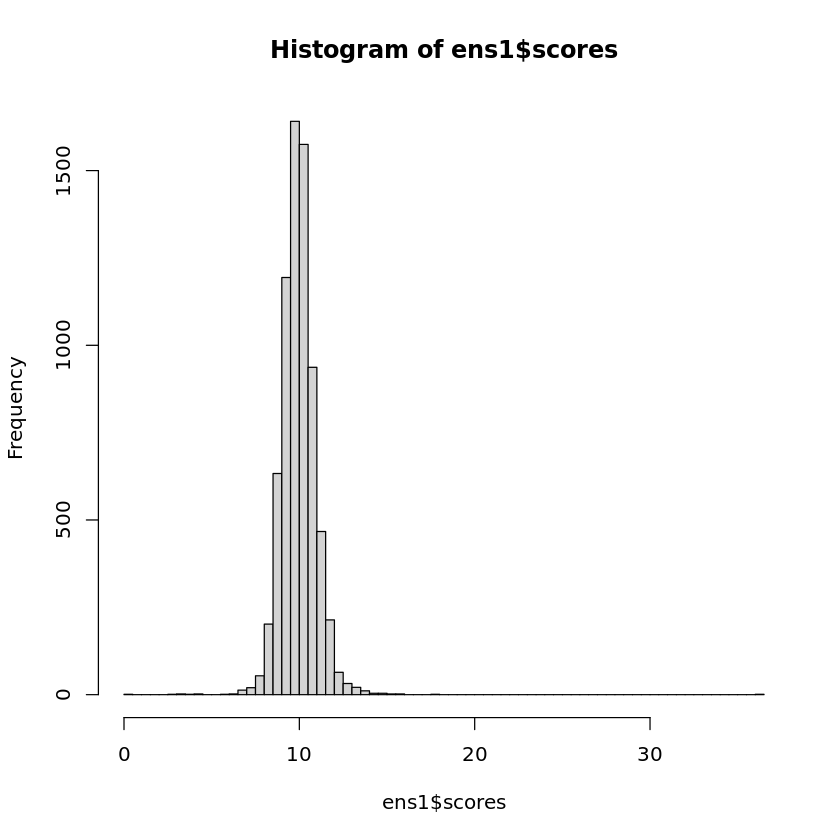

In [31]:
hist(ens1$scores, breaks = sqrt(length(ens1$scores)))

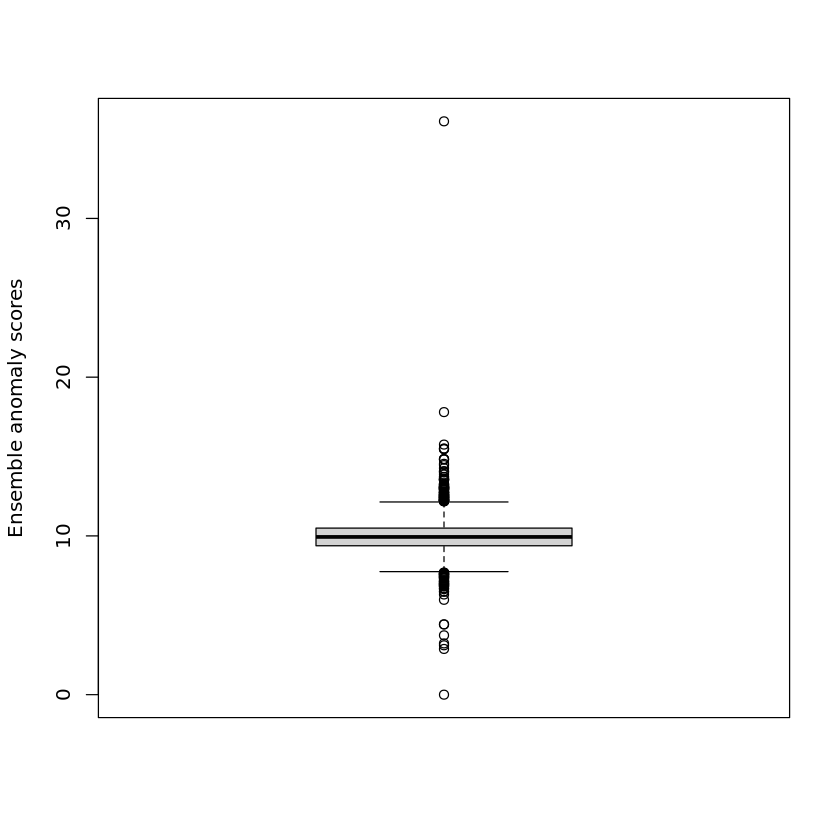

In [32]:
boxplot(ens1$scores,
  ylab = "Ensemble anomaly scores"
)

## Export

In [33]:
df <- cbind.data.frame(index, data, y1, y2, y4, y5, y6$LDF, ens1$scores)

In [34]:
colnames(df) <- c('micro_specimen_id', 'person_id', colnames(data), 'y_knn_agg', 'y_lof', 'y_inflo', 'y_kdeos', 'y_ldf', 'ensemble_scores')

In [35]:
head(df)

,micro_specimen_id,person_id,seven_day_mortality,fourteen_day_mortality,twentyone_day_mortality,twentyeight_day_mortality,sixty_day_mortality,ninety_day_mortality,onetwenty_day_mortality,Ambulatory.Clinic...Center,⋯,bicarbonate_last,hemoglobin_last,creatinine_last,time_to_antibiotic,y_knn_agg,y_lof,y_inflo,y_kdeos,y_ldf,ensemble_scores
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2940,2940,-470494077,0,0,0,1,1,1,1,0,⋯,0.04854061,-0.85754314,-0.077536416,0.01877790,379.9726,0.9770689,1.0182663,NaN,1.0000000,9.475134
3236,3236,-762840899,0,1,1,1,1,1,1,0,⋯,0.62190535,-1.03771174,0.988716133,0.01877790,313.6969,1.0086139,0.9173485,NaN,0.9999999,9.341630
3720,3720,-1481508426,0,0,0,0,0,0,0,0,⋯,1.00414851,-0.37709353,-0.290786926,0.02208091,389.3603,1.4408002,1.4436545,1.00000000,1.0000000,11.626273
5214,5214,2090709572,0,0,0,0,0,0,0,0,⋯,-1.09818886,-0.67737453,-0.504037436,-1.10796089,212.1525,1.0077021,0.9635029,0.04563032,0.9757483,8.984906
10611,10611,-961491032,0,0,0,0,0,0,0,0,⋯,-0.33370255,0.04329988,-0.859454953,0.03405431,422.9763,1.1751721,0.9553521,1.00000000,1.0000000,10.525898
10923,10923,-643089122,0,0,0,1,1,1,1,0,⋯,-1.48043202,-0.97765554,-0.006452913,0.03281568,310.4655,1.0785824,0.7159183,1.00000000,1.0000000,9.269045


In [36]:
data.dir <- paste(getwd(), "data", sep="/")
data.matrix.final <- paste(data.dir, "data_matrix_anomalies.csv", sep="/")
write.csv(df, data.matrix.final, row.names = FALSE)